# Methodology
## A. Importing needed library 
1. random to set random value
2. numpy as mathematical tool
3. matplotlib.pyplot for graph
4. math 

In [1]:
#Import Needed library
import random
import numpy as np
import matplotlib.pyplot as plt
import math
k = 1  #boltzman constant equate to 1 for ease of simulation

## B. Initgrid Function, creating the states of 50% of oil and 50% of water (set to be 10x10 matrices)

In [2]:
#Creating random matrix that composed of equal 50-50 of 0 and 1 (Water and Oil)
def initgrid():
  matrix = np.random.randint(2, size=(10, 10))                                  #creating a 10 by 10 matrix abd filling it with 
  sum = np.sum(matrix)                                                          #sum up all values in matrix
  if sum == 50:                                                                 #making sure that the original matrix has 50 oil, 50 water
    return matrix
  else:
    return initgrid()                                                           #else rerun function

## C. Energy Calculation Function, calculating the energy interaction of unlike states by 1 and like states by 0 (the boundary in periodic. Recall : Condensed Matter Physics Lattice Construction)

In [3]:
#Calculate Energy Values at each point
def add_index_energy(matrix,i,j):
  counter = 0
  
  def diff_value_abs(matrix,i,j,direction):
    if direction == "left":    
      return abs(matrix[i,j]-matrix[i-1,j])
    elif direction == "right":
      return abs(matrix[i,j]-matrix[i+1,j])
    elif direction == "up":
      return abs(matrix[i,j]-matrix[i,j+1])
    elif direction == "down":  
      return abs(matrix[i,j]-matrix[i,j-1])
    else:
      return "Error"
  #The function is created with general and special cases, the special cases is to analyze the function on every corner and the side of the box

  if i == 0: 
    if j == 0: #Case 1 : Corner Value (0,0)
      counter += abs(matrix[0,0]-matrix[0,1]) + abs(matrix[0,0]-matrix[1,0]) + abs(matrix[0,0]-matrix[9,0]) + abs(matrix[0,0]-matrix[9,9])
      return counter
    elif j == 9: #Case 2 : Corner Value (0,9)
      counter += abs(matrix[0,9]-matrix[0,8]) + abs(matrix[0,9]-matrix[1,9]) + abs(matrix[0,9]-matrix[0,0]) + abs(matrix[0,9]-matrix[9,9])
      return counter
    else: #Case 5 : Topmost Value (0,j)
      counter += abs(matrix[0,j]-matrix[9,j]) + abs(matrix[0,j]-matrix[1,j]) + abs(matrix[0,j]-matrix[0,j+1]) + abs(matrix[0,j]-matrix[0,j-1])
      return counter
  elif i == 9: #Case 3,4,8
    if j == 0: #Case 3 : Corner Value (9,0)
      counter += abs(matrix[9,0]-matrix[8,0]) + abs(matrix[9,0]-matrix[9,1]) + abs(matrix[9,0]-matrix[0,9]) + abs(matrix[9,0]-matrix[0,0])
      return counter
    if j == 9: #Case 4 : Corner Value (9,9)
      counter += abs(matrix[9,9]-matrix[9,0]) + abs(matrix[9,9]-matrix[0,9]) + abs(matrix[9,9]-matrix[9,8]) + abs(matrix[9,9]-matrix[8,9])
      return counter
    else: #Case 8 : Belowmost Value (9,j)
      counter += abs(matrix[9,j]-matrix[8,j]) + abs(matrix[9,j]-matrix[0,j]) + abs(matrix[9,j]-matrix[9,j+1]) + abs(matrix[9,j]-matrix[9,j-1])
      return counter
  elif j == 0: #Case 7
    #Case 7 : Letmost Value (i,0)
    counter += abs(matrix[i,0]-matrix[i-1,0]) + abs(matrix[i,0]-matrix[i+1,0]) + abs(matrix[i,0]-matrix[i,1]) + abs(matrix[i,0]-matrix[i,9])
    return counter
  elif j == 9: #Case 6
    #Case 6 : Rightmost Value (i,9)
    counter += abs(matrix[i,9]-matrix[i-1,9]) + abs(matrix[i,9]-matrix[i+1,9]) + abs(matrix[i,9]-matrix[i,0]) + abs(matrix[i,9]-matrix[i,8])
    return counter
  #The general cases is the adding function from the diff_value_abs(matrix,i,j,direction) which is iterative 
  else:
    counter += diff_value_abs(matrix,i,j,"left") + diff_value_abs(matrix,i,j,"right") + diff_value_abs(matrix,i,j,"up") +  diff_value_abs(matrix,i,j,"down") 
    return counter

## D. Swap Function, swapping the unlike states and creating the new state of matrix

In [4]:
#randomise 2 particles to swap
def swap(matrix_1):
  #Creating 2 random row and column for swapping
  rdm1 = random.randint(0,9)
  rdm2 = random.randint(0,9)
  rdm3 = random.randint(0,9)
  rdm4 = random.randint(0,9)
  #Creating 2 random row and column for swapping  
  if matrix_1[rdm1,rdm2] == 1 and matrix_1[rdm3,rdm4] == 0:
    store = matrix_1[rdm3,rdm4]
    matrix_1[rdm3,rdm4] = matrix_1[rdm1,rdm2]
    matrix_1[rdm1,rdm2] = store
    return matrix_1
  #Creating 2 random row and column for swapping  
  elif matrix_1[rdm1,rdm2] == 0 and matrix_1[rdm3,rdm4] == 1:
    store = matrix_1[rdm3,rdm4]
    matrix_1[rdm3,rdm4] = matrix_1[rdm1,rdm2]
    matrix_1[rdm1,rdm2] = store
    return matrix_1
    #Creating 2 random row and column for swapping
  else:
    return swap(matrix_1)

## E. Density : Calculating the density of states (DOS) in certain point

In [5]:
def add_index_density(matrix,i,j):
  counter = 0
  
  def local_density(matrix,i,j,direction):                                      #i,j is row,column
    if direction == "centre":
      return matrix[i,j]
    elif direction == "left":    
      return matrix[i,j-1]
    elif direction == "right":
      return matrix[i,j+1]
    elif direction == "up":
      return matrix[i-1,j]
    elif direction == "down":  
      return matrix[i+1,j]
    elif direction == "topleft":    
      return matrix[i-1,j-1]
    elif direction == "topright":    
      return matrix[i-1,j+1]
    elif direction == "bottomleft":    
      return matrix[i+1,j-1]
    elif direction == "bottomright":    
      return matrix[i+1,j+1]
    else:
      return "Error"
  #The function is created with general and special cases, the special cases is to analyze the function on every corner and the side of the box

  if i == 0: 
    if j == 0: #Case 1 : Corner Value (0,0)
      counter += matrix[0,0] + matrix[9,9] + matrix[0,9] + matrix[1,9] + matrix[9,0] + matrix[9,1] + matrix[1,0] + matrix[0,1] + matrix[1,1]
      return counter/9
    elif j == 9: #Case 2 : Corner Value (0,9)
      counter += matrix[0,9] + matrix[9,0] + matrix[9,9] + matrix[9,8] + matrix[0,0] + matrix[1,0] + matrix[0,8] + matrix[1,9] + matrix[1,8]
      return counter/9
    else: #Case 5 : Topmost Value (0,j)
      counter += matrix[0,j] + matrix[0,j-1] + matrix[0,j+1] + matrix[1,j] + matrix[1,j-1] + matrix[1,j+1] + matrix[9,j] + matrix[9,j+1] + matrix[9,j-1]
      return counter/9
  elif i == 9: #Case 3,4,8
    if j == 0: #Case 3 : Corner Value (9,0)
      counter += matrix[9,0] + matrix[0,9] + matrix[0,0] + matrix[0,1] + matrix[9,9] + matrix[8,9] + matrix[8,0] + matrix[8,1] + matrix[9,1]
      return counter/9
    if j == 9: #Case 4 : Corner Value (9,9)
      counter += matrix[9,9] + matrix[0,0] + matrix[8,0] + matrix[9,0] + matrix[0,8] + matrix[0,9] + matrix[8,8] + matrix[8,9] + matrix[9,8]
      return counter/9
    else: #Case 8 : Belowmost Value (9,j)
      counter += matrix[9,j] + matrix[9,j-1] + matrix[9,j+1] + matrix[8,j] + matrix[8,j-1] + matrix[8,j+1] + matrix[0,j] + matrix[0,j-1] + matrix[0,j+1]
      return counter/9
  elif j == 0: #Case 7
    #Case 7 : Letmost Value (i,0)
    counter += matrix[i,0] + matrix[i-1,0] + matrix[i+1,0] + matrix[i,9] + matrix[i-1,9] + matrix[i+1,9] + matrix[i,2] + matrix[i-1,2] + matrix[i+1,2]
    return counter/9
  elif j == 9: #Case 6
    #Case 6 : Rightmost Value (i,9)
    counter += matrix[i,9] + matrix[i-1,9] + matrix[i+1,9] + matrix[i,8] + matrix[i-1,8] + matrix[i+1,8] + matrix[i,0] + matrix[i-1,0] + matrix[i+1,0]
    return counter/9
  #The general cases is the adding function from the diff_value_abs(matrix,i,j,direction) which is iterative 
  else:
    counter += local_density(matrix,i,j,"left") + local_density(matrix,i,j,"right") + local_density(matrix,i,j,"up") +  local_density(matrix,i,j,"down") + local_density(matrix,i,j,"topleft") + local_density(matrix,i,j,"topright") + local_density(matrix,i,j,"bottomleft") +  local_density(matrix,i,j,"bottomright") + local_density(matrix,i,j,"centre")  
    return counter/9

## F. Creating the discrete examples as to understanding the flow of programming
1. Initgrid : Set the random state
2. Energy Function : Calculate each energy
3. Density Function : Calculate each density
3. Print the states, and energy states and sum
4. Print the density states

In [6]:
matrix_1 = initgrid() # matrix_1: POSITION OF WATER AND OIL # matrix = matrix_energy
matrix_energy = np.zeros((10, 10))  # create matrix of 0s
for i in range(10):
  for j in range(10):
      matrix_energy [i,j] = add_index_energy(matrix_1,i,j) # matrix: 
      # INTERACTION ENERGY MATRIX DIAGRAM

print('50-50 Element State')
print(matrix_1)
print('\nEnergy State')
print(matrix_energy)
print(matrix_energy.sum()) #calculate total energy

50-50 Element State
[[1 0 0 1 0 1 0 1 1 0]
 [1 1 0 1 0 1 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [1 1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 0 1 0 1 1]
 [1 0 1 1 1 0 1 1 1 1]
 [0 1 0 0 1 1 1 1 1 0]
 [0 1 0 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 1 0 1]
 [0 1 0 0 1 1 0 1 0 0]]

Energy State
[[3. 3. 1. 3. 3. 2. 3. 2. 3. 2.]
 [2. 3. 3. 3. 2. 1. 2. 2. 1. 1.]
 [2. 3. 4. 3. 2. 1. 2. 1. 0. 0.]
 [3. 2. 3. 2. 1. 2. 3. 0. 1. 2.]
 [4. 3. 3. 1. 1. 3. 3. 3. 2. 2.]
 [3. 4. 3. 1. 1. 3. 1. 1. 0. 1.]
 [2. 3. 2. 3. 1. 2. 1. 1. 2. 3.]
 [3. 3. 2. 3. 2. 3. 1. 2. 2. 3.]
 [3. 3. 0. 1. 3. 3. 2. 3. 2. 2.]
 [3. 4. 1. 2. 3. 1. 2. 2. 2. 1.]]
212.0


In [7]:
matrix_density = np.zeros((10, 10)) #create matrix of 0s
for i in range(10):
  for j in range(10):
      matrix_density [i,j] = add_index_density(matrix_1,i,j)                                    #matrix: INTERACTION ENERGY MATRIX DIAGRAM

print('Local Density State')
print(matrix_density)
print('\nTotal Density:', matrix_density.sum())                                                             #calculate total energy

Local Density State
[[0.44444444 0.44444444 0.44444444 0.33333333 0.66666667 0.55555556
  0.66666667 0.44444444 0.33333333 0.33333333]
 [0.33333333 0.44444444 0.44444444 0.33333333 0.55555556 0.55555556
  0.66666667 0.44444444 0.22222222 0.33333333]
 [0.33333333 0.55555556 0.55555556 0.44444444 0.66666667 0.66666667
  0.55555556 0.22222222 0.         0.22222222]
 [0.33333333 0.44444444 0.55555556 0.55555556 0.66666667 0.66666667
  0.44444444 0.33333333 0.22222222 0.33333333]
 [0.55555556 0.55555556 0.66666667 0.77777778 0.77777778 0.66666667
  0.44444444 0.55555556 0.55555556 0.66666667]
 [0.44444444 0.44444444 0.55555556 0.66666667 0.66666667 0.77777778
  0.66666667 0.88888889 0.77777778 0.66666667]
 [0.44444444 0.44444444 0.55555556 0.66666667 0.66666667 0.66666667
  0.55555556 0.66666667 0.66666667 0.55555556]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.55555556 0.55555556
  0.55555556 0.44444444 0.55555556 0.44444444]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.55555556 0.4

## G. Creating the plot to understand density distribution and the occurences 

## H. Creating a general function on recursive energy and density function adding. The aim is to get recursive function

In [8]:
T = 4 #int(input('Please enter Temperature:')), # user input temperature


def Emin_energy(T,matrix_1,density_info=False):
  #the initial matrix are swapped and initiating the temporary energy and density value 
  matrix_1_temp = swap(matrix_1)
  matrix_energy_temp = np.zeros((10, 10))   
  matrix_density_temp = np.zeros((10, 10)) 

  # Using the F flow logic process, which is calling the energy and density addition and iteratively adding into the temporary energy and density
  for i in range(10):
    for j in range(10):
      matrix_energy_temp [i,j] = add_index_energy(matrix_1_temp,i,j)                    
      matrix_density_temp [i,j] = add_index_density(matrix_1_temp,i,j)

  # Setting random value between 0 and 1 and checking the energy different condition
  r = random.random()
  delE = matrix_energy_temp.sum()-matrix_energy.sum()                                     

  # execute the code if the energy different are smaller than zero, or the Boltzmann value
  if matrix_energy_temp.sum() < matrix_energy.sum() or r < math.exp(-(delE)/(T)):
    # storing the value into another memory and the ~~~ no point to have this
    matrix_1_new = matrix_1_temp
    matrix_energy_new = matrix_energy_temp
    matrix_density_new = matrix_density_temp
    if density_info == True:
      print('50-50 Element State')
      print(matrix_1_new)
      print('\nNew Energy State')
      print(matrix_energy_new)
      print('\nNew Local Density State')
      print(matrix_density_new)
      print('\nNew Total Density:', matrix_density_new.sum())
      print(matrix_energy_new.sum())
    
    return matrix_1_new, matrix_energy_new, matrix_energy_new.sum(), matrix_density_new, matrix_density_new.sum()
  else:
    return Emin_energy(T,matrix_1)

## I. Creating the recursive function to store the energy

In [9]:
def recursive_energy(T,matrix_1_new,energy_density_info=False):
  # setting the counter for 1000 iteration, energy storing value by list and 
  # measuring the occurences of the density probability
  counter = 0
  energy = [] 
  occurence_final = np.zeros(10)
  
  # creating while loop in order to iterate the process
  while counter < 1000 :
    
    # storing additional memory of the state and use the H function to get the iterative value
    # append the energy sum (c), occurence from density of states (d) 
    matrix_1 = matrix_1_new
    a,b,c,d,e = Emin_energy(T,matrix_1)
    energy.append(c)

    # creating the iterative occurences measurement for density probability
    occurence_total = np.zeros(10)
    for i in range(10):
      occurence = np.zeros(10)
      occurence[i] = np.sum(d == i/9) # d = matrix_density
      occurence_total += occurence
    occurence_final += occurence_total

    # printing the energy states (b) and density value (d) if needed
    if energy_density_info == True:
      print("Trial No.: ", counter)
      print(b)
      print(d)

    counter += 1

  print('Temperature at ' + str(T) + " Measurement Done!")
  return energy, matrix_1_new, list(occurence_final)

## J. Construct the example of recursive energy function at T=4, with the states and able to set up the information

In [10]:
energy, runfunc, density = recursive_energy(T,matrix_1,energy_density_info=False)
print(runfunc)
print(energy)
print(density) #density = occurences

Temperature at 4 Measurement Done!
[[1 1 0 0 0 0 1 1 1 0]
 [0 1 1 1 1 1 1 0 1 0]
 [1 1 0 1 1 1 0 0 0 0]
 [1 0 1 1 0 1 1 0 1 0]
 [0 1 0 1 1 0 0 1 0 0]
 [1 1 1 0 0 1 1 0 1 1]
 [0 0 0 1 0 1 0 0 0 1]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 0 0 0 0 1]]
[212.0, 208.0, 204.0, 196.0, 208.0, 204.0, 208.0, 200.0, 204.0, 204.0, 208.0, 212.0, 208.0, 208.0, 204.0, 212.0, 208.0, 204.0, 208.0, 204.0, 204.0, 212.0, 208.0, 204.0, 204.0, 200.0, 200.0, 192.0, 188.0, 192.0, 196.0, 196.0, 192.0, 196.0, 200.0, 196.0, 200.0, 200.0, 212.0, 204.0, 204.0, 212.0, 208.0, 212.0, 208.0, 208.0, 200.0, 200.0, 208.0, 216.0, 220.0, 222.0, 214.0, 222.0, 218.0, 216.0, 204.0, 200.0, 212.0, 212.0, 204.0, 208.0, 212.0, 208.0, 212.0, 212.0, 216.0, 200.0, 188.0, 184.0, 184.0, 184.0, 188.0, 184.0, 192.0, 196.0, 196.0, 196.0, 192.0, 196.0, 192.0, 196.0, 196.0, 200.0, 204.0, 212.0, 208.0, 212.0, 204.0, 196.0, 204.0, 208.0, 204.0, 200.0, 204.0, 204.0, 204.0, 204.0, 200.0, 204.0, 212.0, 212.0, 208.0, 212.0, 212.0

197.734


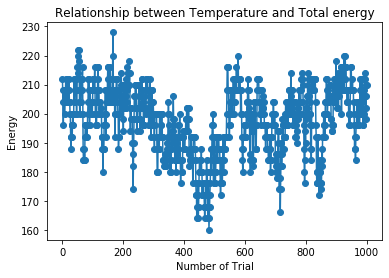

In [11]:
Tx = [i+1 for i in range(1000)]
Ty = energy

import numpy as np
print(np.average(energy))

plt.scatter(Tx,Ty)
plt.title('Relationship between Temperature and Total energy')
plt.xlabel('Number of Trial')
plt.ylabel('Energy')
plt.plot(Tx,Ty)
plt.show()

## K. Create the main function to operate the iteration, which is calling the function J.

In [12]:
def temp_energy(matrix_1):
    # initiating the list of energy, specific heat, and the energy fluctuation (by each temperature)
    energy_by_temp_list = []                  # energy value storing
    specific_heat = []                        # (energy^2)-ave_energy^2 /T^2 or variance(energy)/T^2
    energy_fluctuation_list = []              # append for std
    list_val = [(i+1)/10 for i in range(40)]  # temperature 
    # initiate the empty array to store the density value by the occurences
    density_final = np.zeros(10)
    
    # the iteration is done from 0 to 4 K, separated by 0.1K (40 times)
    for i in range(40):
        # use the recursive energy of each temperature to get energy, states, and density
        energy, runfunc, density = recursive_energy((i+1)/10,matrix_1)
        
        # get the energy fluctuation value append to the list
        energy_fluctuation_list.append(np.std(energy))
        energy_by_temp_list.append(np.average(energy)) # energy_by_temp = np.average(energy) 

        # get the density probability occurences as array and adding to the initialize array
        density_final += np.array(density)

        # create the plot of each temperature, which x is set as the density and y is the occurences
        x_axis_value = [i/9 for i in range(10)]
        y_axis_value = list(np.array(density)/100000)

        plt.scatter(x_axis_value,y_axis_value)
        plt.title('Density Occurences at T : ' + str((i+1)/10))
        plt.xlabel('Density')
        plt.ylabel('Occurences')
        plt.plot(x_axis_value,y_axis_value)
        plt.savefig('energy_fluctuation_temp_at_' + str(i/10) + '.png')
        plt.gcf().canvas.flush_events()
        plt.show(block=False)
        plt.show(block=False)
    # energy_average = np.average(energy_by_temp_list), energy_square = (np.array(energy_by_temp_list))**2
    energy_variance = (np.std(energy_by_temp_list))**2 
    temp_val_square = (np.array(list_val))**2
    # The fluctuation : print(list_val[energy_fluctuation_list.index(max(energy_fluctuation_list))]), (np.average(energy_square) - energy_average**2)/temp_val**2
    specific_heat = list((energy_variance/temp_val_square)**0.5)
    
    return list_val, energy_by_temp_list, specific_heat, list(density_final/4000000), energy_fluctuation_list

Temperature at 0.1 Measurement Done!


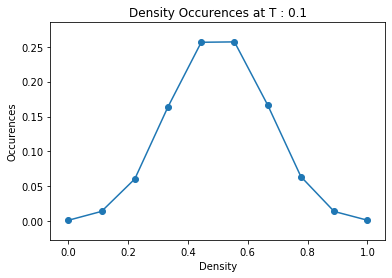

Temperature at 0.2 Measurement Done!


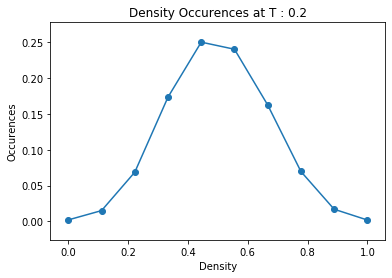

Temperature at 0.3 Measurement Done!


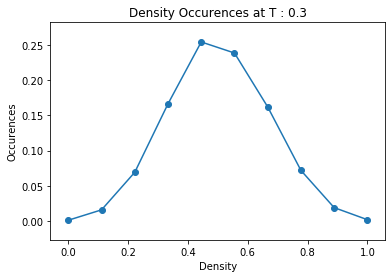

Temperature at 0.4 Measurement Done!


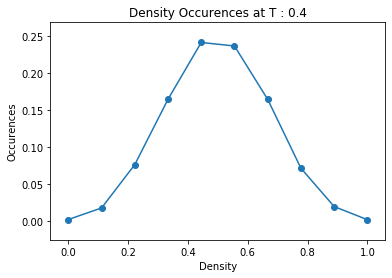

Temperature at 0.5 Measurement Done!


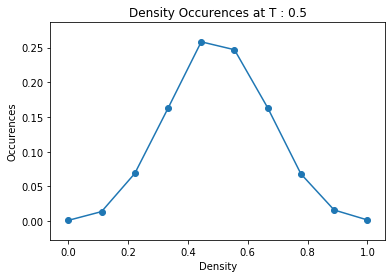

Temperature at 0.6 Measurement Done!


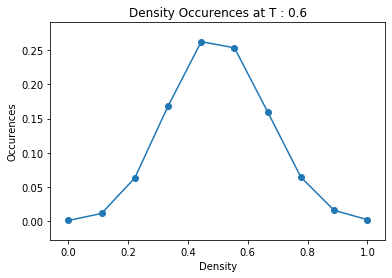

Temperature at 0.7 Measurement Done!


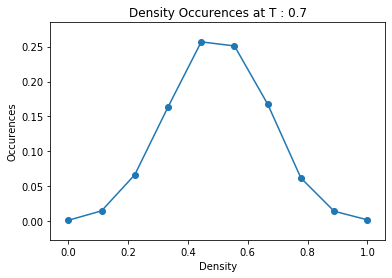

Temperature at 0.8 Measurement Done!


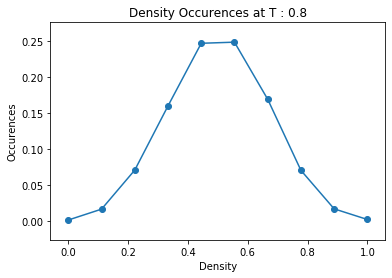

Temperature at 0.9 Measurement Done!


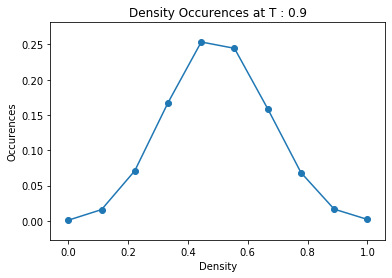

Temperature at 1.0 Measurement Done!


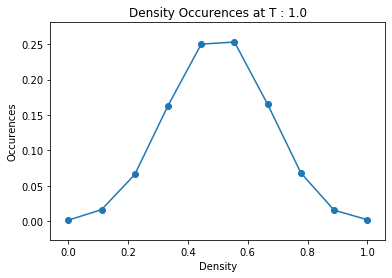

Temperature at 1.1 Measurement Done!


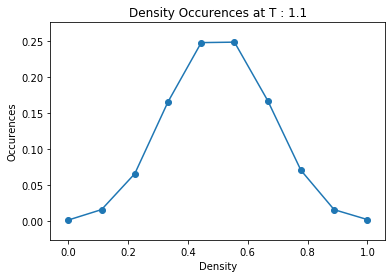

Temperature at 1.2 Measurement Done!


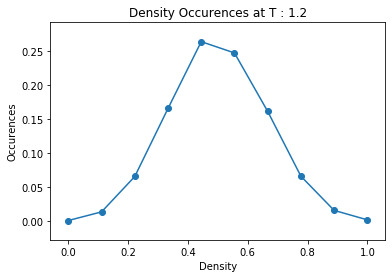

Temperature at 1.3 Measurement Done!


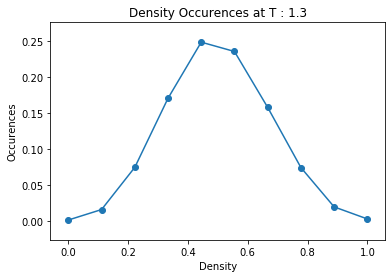

Temperature at 1.4 Measurement Done!


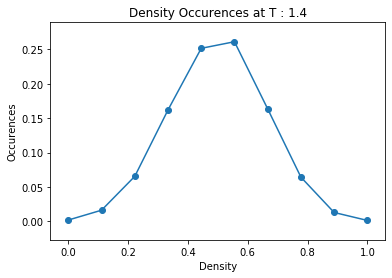

Temperature at 1.5 Measurement Done!


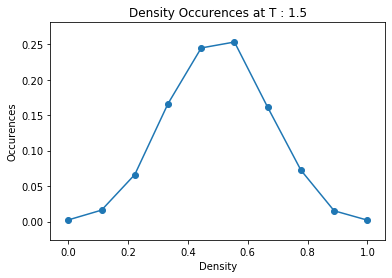

Temperature at 1.6 Measurement Done!


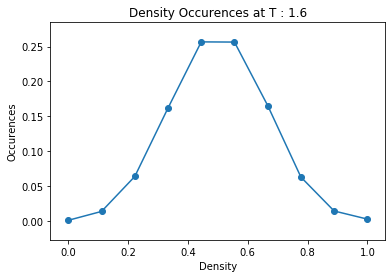

Temperature at 1.7 Measurement Done!


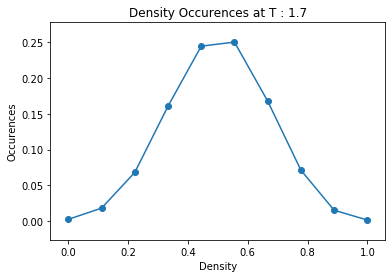

Temperature at 1.8 Measurement Done!


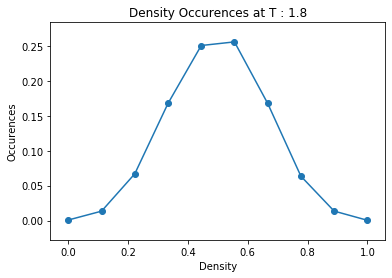

Temperature at 1.9 Measurement Done!


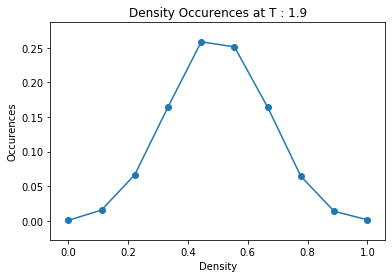

Temperature at 2.0 Measurement Done!


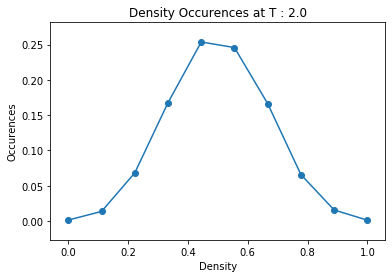

Temperature at 2.1 Measurement Done!


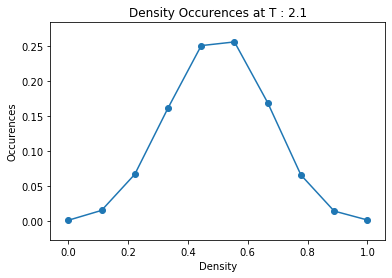

Temperature at 2.2 Measurement Done!


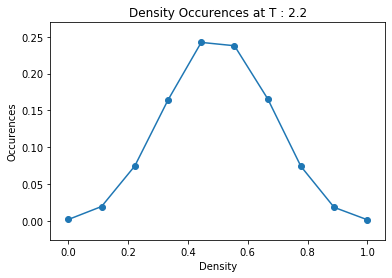

Temperature at 2.3 Measurement Done!


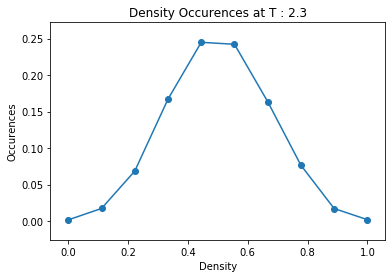

Temperature at 2.4 Measurement Done!


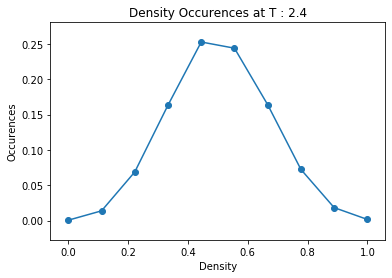

Temperature at 2.5 Measurement Done!


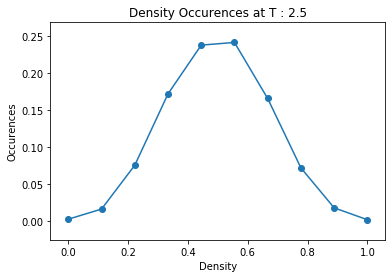

Temperature at 2.6 Measurement Done!


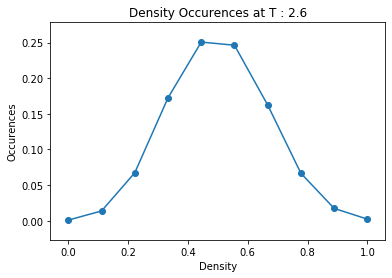

Temperature at 2.7 Measurement Done!


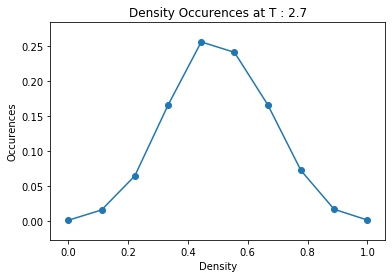

Temperature at 2.8 Measurement Done!


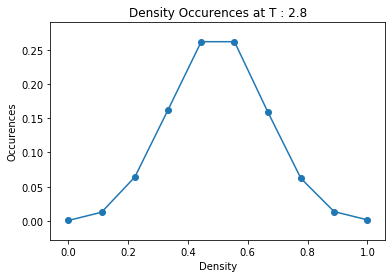

Temperature at 2.9 Measurement Done!


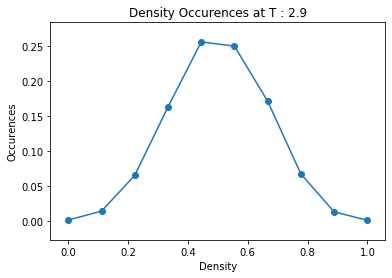

Temperature at 3.0 Measurement Done!


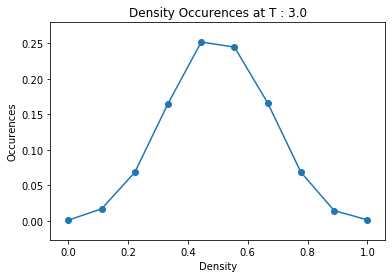

Temperature at 3.1 Measurement Done!


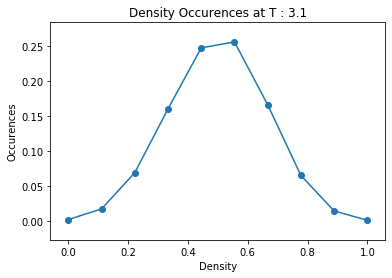

Temperature at 3.2 Measurement Done!


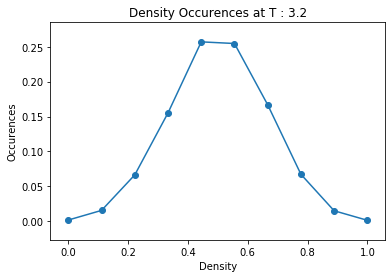

Temperature at 3.3 Measurement Done!


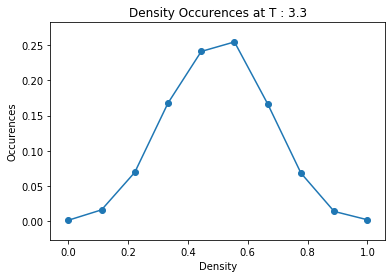

Temperature at 3.4 Measurement Done!


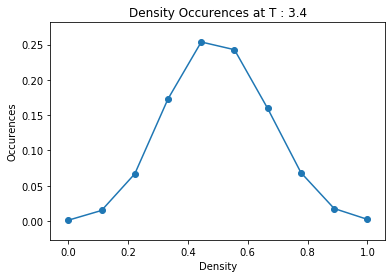

Temperature at 3.5 Measurement Done!


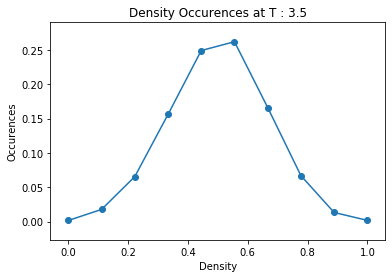

Temperature at 3.6 Measurement Done!


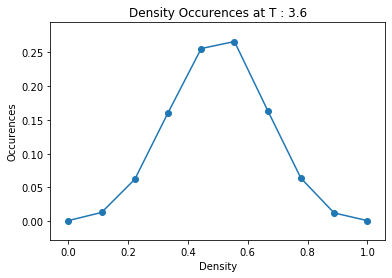

Temperature at 3.7 Measurement Done!


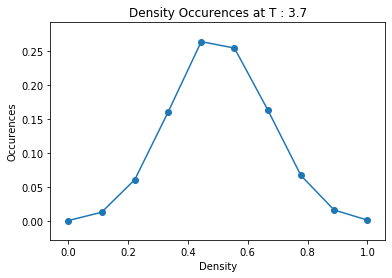

Temperature at 3.8 Measurement Done!


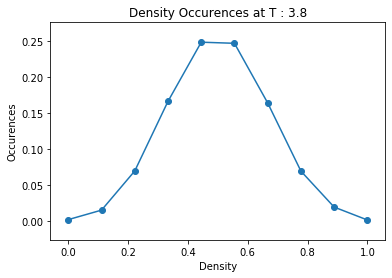

Temperature at 3.9 Measurement Done!


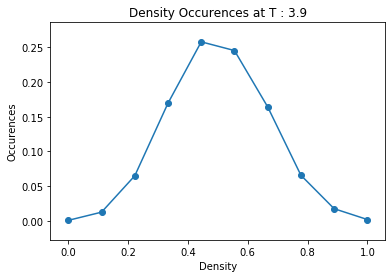

Temperature at 4.0 Measurement Done!


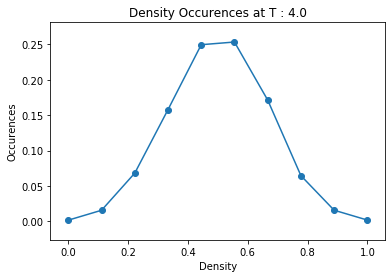

In [13]:
x,y,z,a,b = temp_energy(matrix_1)

# Data Results

In [14]:
def graph(x,y,title,x_label,y_label,file_name):
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.xlim(x_lim)
    # plt.ylim(y_lim)
    plt.plot(x,y)
    plt.savefig(file_name)
    return plt.show()

## Temperature and Total Energy Relationship

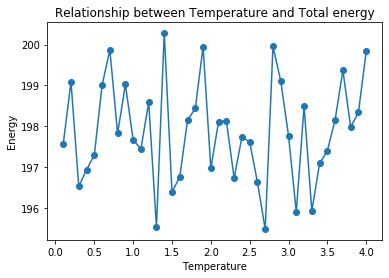

In [15]:
graph(x,y,'Relationship between Temperature and Total energy','Temperature','Energy','energy_temp.png')

## Temperature and Total Energy Fluctuation

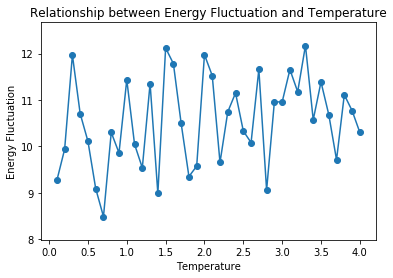

In [16]:
plt.scatter(x,b)
plt.title('Relationship between Energy Fluctuation and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy Fluctuation')
plt.ylim((min(b)-0.5,max(b)+0.5))
plt.plot(x,b)
plt.savefig('energy_fluctuation_temp.png')
plt.show()

## Temperature and Specific Heat 

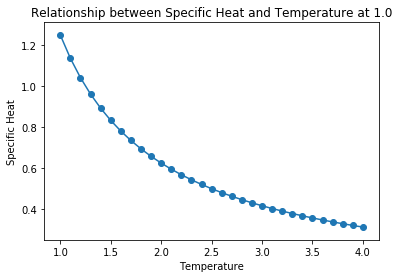

In [17]:
boundary = 9
graph(x[boundary:40],z[boundary:40],'Relationship between Specific Heat and Temperature at ' + str((boundary+1)/10),'Temperature','Specific Heat','specific_heat_temp_1_4.png')

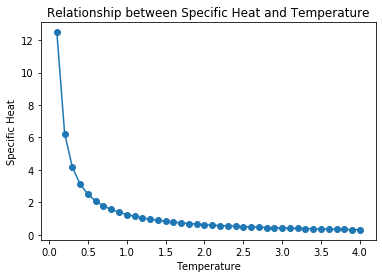

In [18]:
graph(x,z,'Relationship between Specific Heat and Temperature','Temperature','Specific Heat','specific_heat_temp.png')

## Density Probability and Occurences

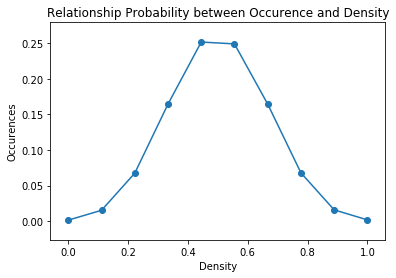

In [19]:
g = [i/9 for i in range(10)]
graph(g,a,'Relationship Probability between Occurence and Density','Density','Occurences','total_density_temp.png')